In [4]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

{u'start_slideshow_at': 'selected', u'theme': 'sky', u'transition': 'zoom'}

#Non-stationary problems and low-rank approximation of matrices and tensors
#####Ivan Oseledets, Skolkovo Institute of Science and Technology 
##### oseledets.github.io, i.oseledets@skoltech.ru



### Talk: http://github.com/oseledets/talks-online/tubingen-2015

## Skoltech
- Founded in 2011 as a new Western-style university near Moscow http://faculty.skoltech.ru
- In collaboration with MIT
- No departments: priority areas "IT, Bio, Space and Nuclear"
- At the moment, 160 master students, 30 professors, 40 postdocs, 50 PhD studens 

## MMMA-2015
In August 23-28 2015 we hold the **4-th Moscow conference in Matrix Methods in Mathematics and Applications**.  

Confirmed speakers: C. Schwab, P. G. Martinsson, B. Benner, J. White, D. Zorin, P.-A.Absil, A. Cichocki, P. Van Dooren.

**Good time to visit Moscow** (i.e., due to the exchange rate drop from 35 roubles/dollar to 55 roubles/dollar). 



http://matrix.inm.ras.ru/mmma-2015/

<img width=30% src="technopark-2.png">

## Talk plan
The main goal of this talk is to show **different connections** between non-stationary problems and optimization on low-rank manifolds of matrices and tensors

- **Part 1:** Low-rank approximation of the Lyapunov equation and ODEs
- **Part 2:** Low-rank approximation and unbounded domains ("inflation method")
- **Part 3:** The concept of dynamical low-rank approximation and its applications

## Optimal subspace selection for ODEs

The details for this part of the talk can be found in the paper  
[From low-rank approximation to an efficient rational Krylov subspace method for the Lyapunov equation, D. A. Kolesnikov, I. V. Oseledets](http://arxiv.org/abs/1410.3335)

Consider a linear system of ODEs,

$$\frac{dy}{dt} = Ay, y(0) = y_0.$$

All methods for solving such problems are based on a careful selection of a **low-dimensional subspace** $U$

such that

$$y(t) \approx U c(t),$$

where $U^* U = I$ and $U$ has $r$ columns.

## Optimal subspace selection: functional

The solution is given as $$y(t)  = \exp(At) y_0,$$ 

assuming that $y(t) \rightarrow 0$ when $t \rightarrow \infty$, the natural error measure is

$$F(U) = \int^{\infty}_0 \Vert y - \widehat{y} \Vert^2 dt, $$

where $\widehat{y} = UU^* y(t)$

## "Exact" optimal subspace

In model order reduction, the exact solution for such subspace seems to be well-known (however, we did not find exactly the same result)

1. We have to solve the Lyapunov equation
$$AX + XA^{\top} = -y_0 y^{\top}_0$$
2. Compute its eigendecomposition $X = U \Lambda U^*$, and leave $r$ leading eigenvectors.

## Problem with the "optimal solution"
The problem with the optimal solution is that even if $U$ is given, 

$$c(t) = U^* y(t)$$ 

is **not computable**

Simple idea is to replace it with **Galerkin projection**

$$c(t) \approx \widehat{c}(t) = e^{Bt} U^* y_0, $$

where $B = U^* A U$.

## Modified functional 
The modified functional:

$$\widetilde{y}  = U e^{Bt} U^* y_0,$$

$$F(U) = \int^{\infty}_0 \Vert y - \widetilde{y} \Vert^2 dy.$$

And this functional is computable!

## The functional
$\def\trace{\mathop{\mathrm{tr}}\nolimits}$
The functional can be written as

\begin{equation*}
    F(U) = F_1(U) - 2 F_2(U),  
\end{equation*}
\begin{equation}
\begin{split}
F_1(U) &= \trace X - \trace Z,\\
F_2(U) &= \trace U^{\top} (P - U Z),
\end{split}
\end{equation}

where $P$ is the solution of the Sylvester equation and $Z$ is solution of
the Lyapunov equation:

\begin{equation}
\begin{split}
A P + P B^{\top} &= -y_0 c_0^{\top},\\
B Z + Z B^{\top} &= -c_0 c_0^{\top}.
\end{split}
\end{equation}


## Error estimate 
If $F(U)$ is small it gives an error bound for the Lyapunov equation:

 $\Vert X - PU^* - U P^* + U Z U^* \Vert \leq 2 F(U)$.

## Numerical method

**Method 1**: $U_{new} = \begin{bmatrix} U & P - UZ \end{bmatrix}$,

double the size of the basis at each step.

**Method 2**: We found that effectively the basis is expanded by only $1-2$ vectors, and based on this we obtained a **very simple** method.

## ALR method

At each step we add to the basis $U$ two vectors:

1. A next Krylov vector $w_k$ 
2. Next rational Krylov vector $v_k = (A + s I)^{-1} w_k$, where $s = q^* A q$, 
  and $q$ is the **normalized last row** of the matrix $Z$ that solves
  $$BZ + Z B^* = c_0 c^*_0$$

## Existing approaches
We ended up with Rational-Krylov-type method (there are many others), 

1. KPIK (Knizhnermann, Druskin, Simoncini) - $A$ and $A^{-1}$ subspaces
2. RKSM (Druskin, Simoncini) - optimize the shifts to minimize the spectral error

## Main difference to RKSM
The shifts generated by ALR are contained in the numerical range of $B$, not $A$, and are much less **spread**, but the convergence is **not worse** then for RKSM.

<img width=100% src="test.jpg">

## Future work
We are working on the convergence estimates for ALR, but they are not clear.

## Part 2

Now we go to the next part of the talk: diffusion/Schrodinger equation in **unbounded domains** using "inflation" method with low-rank approximation.

It is based on the joint work with my postdoc [Mikhail Litsarev](http://oseledets.github.io/people/litsarev/)

The idea is described in the paper
[Low-rank approach to the computation of path integrals](http://arxiv.org/abs/1504.06149)


## Unbounded domains

I will illustrate the idea on the Schroedinger equation. 
\begin{equation}
i \frac{\partial }{\partial t } \psi(x, t )=
\left (  -\frac{1}{2} \nabla^2+ V(x)  \right) \psi(x, t ), \quad \psi(x, 0) = \psi^{(0)}(x).
\end{equation}

## Discretization on an infinite grid

$$
\frac{\partial}{\partial t} \psi_k(t) =  i \frac{\psi_{k-1}(t) - 2 \psi_k(t) + \psi_{k+1}(t)}{2h^2} + V(x_k) \psi_k(t), \quad \psi_k(0) = \psi^{(0)}(x_k), \quad x_k = k h, \quad k  \in \mathbb{Z}. 
$$


## Matrix form
\begin{equation}
\left \{
\begin{split}
&\frac{d}{d t} \mathbf{\psi} (t)=
\mathbf{i}\, \mathbf{H} \, \mathbf{\psi} (t), \\
&\mathbf{\psi}(0) = \mathbf{\psi}_0,
\end{split}
\right.
\qquad
\mathbf{H}=\mathbf{K}+\mathbf{V},
\end{equation}

The matrix $\mathbf{K}$ is a bi-infinite tridiagonal symmetric Toeplitz matrix with elements
$$K_{kl} = \mathbf{k}_{k-l}, $$
wher $\mathbf{k}_0 = -\frac{2}{h^2}$, $\mathbf{k}_1 = \mathbf{k}_{-1} = \frac{1}{h^2}$ and all other elements of $\mathbf{k}$ are equal to $0$. The operator $\mathbf{V}$            
corresponds to a bi-infinite diagonal matrix with elements $V(x_k)$ on the diagonal.

## Splitting scheme
Now we apply the second-order Marchuk-Strang splitting

$$\psi(t + \tau) = e^{i \mathbf{H} \tau} \psi(t) = e^{i \mathbf{V} \tau/2} e^{i \mathbf{K} \tau} e^{i \mathbf{V} \tau/2} \psi(t) + \mathcal{O}(\tau^3).$$

Since matrix $\mathbf{V}$ is a diagonal matrix, its exponent is also a diagonal matrix.  The most interesting part is
the computation of the action of the matrix exponent

\begin{equation}
\widehat{\varphi} = e^{i \mathbf{K} \tau} \varphi. 
\end{equation}

## Exponent of an infinite Laplacian
Since the matrix $\mathbf{K}$ is a Toeplitz matrix, the exponent is also a Toeplitz matrix, and the action of the operator is
a **convolution**
$$\widehat{\varphi}_k = \sum_{l=-\infty}^{\infty} \mathbf{b}_{l} \varphi_{l+k}.$$

The coefficients $b_l$ depend on $\tau$ and $h$.

**Theorem**: $b_l$ are exponentially decaying for $|l| > M$, $M  \sim \frac{\tau}{h^2}$.


## Demo
Now the short demo

Mx =  603


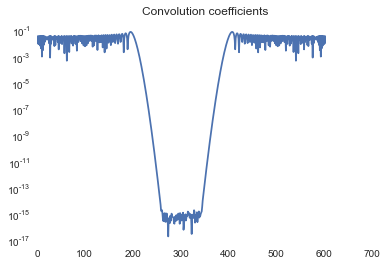

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
Nx = 200
Mx = 3 * Nx + 3
hx = 1.0/Nx
tau = hx
print 'Mx = ', Mx
H = np.zeros(Mx)
H[0] = -2
H[1] = 1
H[Mx - 1] = 1
cf = 0.5 * tau / (hx ** 2)
H = -cf * H
lam_analytic = fft(H)
band = ifft(np.exp(-1j * lam_analytic))
abs_band = abs(band)
plt.semilogy(abs_band)
plt.title('Convolution coefficients')

## Main idea: inflation method
We can replace the infinite convolution by a window one!

$$\widehat{\varphi}_k \approx \sum_{l=-M/2}^{M/2} \mathbf{b}_{l} \varphi_{k+l}.$$

Thus, if we know the solution at $[-L, L]$, we can compute it for $[-L+M/2, L-M/2]$ (smaller interval).

How big $L$ should be? 

$\tau \sim h$, $M \sim \frac{1}{h}$, thus to get time $T$ we need at least $MT$ steps. 

At each step $M$ points disappear, thus $L \sim TM^2$ points are needed (**inflated domain**).

How to break the complexity/storage problems?

## Use low-rank!

1. Take the grid uniform $x_k$ with $K M$ points, values of $f$ on this grid 
and **reshape it into $K \times M$ matrix.**
2. Approximate it by rank-$r$ matrix.

**Theorem** After one convolution the rank is at most $2r$ (thus we approximate).

Intialization and multiplication by $e^{i V \tau}$ is done **cross approximation**.

## Numerical experiment
For numerical experiment we used diffusion equation in a weird potential which is non-periodic.
<p>
</p>
<div style="float: left; width: 40%; margin-right: 5%; margin-bottom: 0.5em">
Solution (and convergence)
<img src="ux2.jpg" width=100%> 
</div>
<div style="float: left; width: 40%; margin-right: 5%; margin-bottom: 0.5em">
Potential and initial condition
<img src="vf1.jpg" width=100%>
</div>


## Summary 
- Inflated domain allows us to accurately compute solution without artificial boundaries
- Experimentally verified low-rank structure
- Easy to  extend to other types of problems (2D, 3D, wave equations)
- Theory?

## Part 3

Why we need dynamical low-rank approximation (with an application).

## Low-rank approximation of matrices

Given a matrix $A$ its **low-rank approximation** can be parametrized by the product $UV^{\top}$.


$$A \approx UV^{\top}, $$

where $U$ is $n \times r$ and $V$ is $m \times r$.

## Computing low-rank factorization

Minimization of 
$$\min_{\mathrm{rank}(A_r)=r}\Vert A - A_r \Vert_2 = \sigma_{r+1}$$

can be done by the singular value decomposition (SVD).

Or by **sampling** and **cross approximation**

## Function approximation

In the function approximation, low-rank approximation is equivalent to the **separation of variables**  


$$f(x_1, \ldots, x_d) \approx \sum_{\alpha=1}^r U_1(x_1, \alpha) \ldots U_d(x_d, \alpha),$$

Often is better to use **stable** tensor formats (TT-format, HT-format).

The main problem is to select **right variables** that **can be separated**

## A typical setup

Recommender system: we have a **user-product matrix**, and we want to fill the missing entries.

We solve **matrix completion** problem:

$$\Vert W \circ (A - B) \Vert \rightarrow \min$$

But the accuracy is then measured using only the sign of the approximation! (sign-rank problem!).

## General principle

It means, you have to use **absolutely different** functional (not quadratic, not matrix completion) in the minimization problem.

For a sign-rank, a good surrogate is the **logistic loss**

$$l(x, y) = \log(1 + e^{-(2y - 1)x}) $$

$$F(X, Y)  = \sum_{ij} l(x_{ij}, y_{ij})$$

Then we minimize $F(X, Y)$ given $Y$ subject to low-rank constraints on $X$.


**Non-quadratic functional** -- forget about **alternating least squares**

## Riemannian optimization

One of the most important properties of low-rank formats is the structure of the **tangent space**

Given $A = U S V^{\top}$, with orthonormal $U$ and $V$ the tangent space is defined as

$$Z = U S V^{\top} + \delta U S V^{\top} + U \delta S V^{\top} + U S \delta V^{\top},$$

subject to $$\delta U^{\top} U + U^{\top} \delta U = \delta V^{\top} V + V^{\top} \delta V = 0$$

The projector onto the tangent space is given by 

$$P_T(Z) = Z - (I - UU^{\top}) Z (I - VV^{\top})$$

We can write down the projector for TT/HT formats as well!

Given the projector, you can solve the problems!

## Optimization methods on manifolds

For the low-rank manifold (matrix, TT, HT) we can efficiently compute the **projection** to the tangent space.


The simplest is to **project the gradient onto the tangent space:**

$$x_{k+1} = R(x_k + P_{\mathcal{T}}(\nabla F)), $$

where $R$ is the mapping from the tangent space to the manifold, called **retraction**.

## Summary 

- Use the functional you want to minimize, not quadratic loss
- Try the Riemannian gradient descent first: simple to use, often converges well


## Tensors 

- The most challenging problems are problems with **tensors** (curse of dimensionality, tricky optimization questions).

- There are **tensor formats** that are **matrix low-rank approximation manifolds** in disguise

- We can use efficient matrix techniques for working with them.

## Tensor-train  format

The simplest SVD-based format is the **tensor-train format**

$$A(i_1, \ldots, i_d) = G_1(i_1) \ldots G_d(i_d),$$

i.e. the **product of matrices, depending only on 1 index**, $G_k(i_k)$ is $r_{k-1} \times r_k$ and $r_0 = r_d = 1$.


## Canonical format

A popular choice in function approximation is the **canonical** or sum-of-products format

$$A(i_1, \ldots, i_d) \approx \sum_{\alpha=1}^r U_1(i_1, \alpha) \ldots U_d(i_d, \alpha),$$

i.e. sum of separable functions.

Disadvantage: **it is not a stable format**: the best approximation may not exist, and may be hard to compute if we know that it exists!

However, for a particular tensor $A$ **it can be very efficient**.

## Tensor train
The TT-format 

$$A(i_1, \ldots, i_d) = G_1(i_1) \ldots G_d(i_d),$$

can be characterized by the following condition:

$$\mathrm{rank}(A_k) = r_k,$$

where $A_k = A(i_1 i_2 \ldots i_k; i_{k+1} \ldots i_d)$ is the **k-th unfolding** of the tensor.

I.e. it is the **intersection of low-rank matrix manifolds**!

## Software
We have a TT-Toolbox, both in MATLAB http://github.com/oseledets/TT-Toolbox and in Python http://github.com/oseledets/ttpy 
- Computing the TT representation (i.e. checking if there is such a representation)
- Performing basic operations
- Adaptive sampling algorithms (cross approximation)
- Optimization algorithms 

## Optimization over TT-manifold

Given $A(i_1, \ldots, i_d) = G_1(i_1) \ldots G_d(i_d)$ optimize over one core $G_k(i_k)$.  

- Good for **quadratic functionals**, and also you can parametrize     
    
    $$\mathrm{vec}(A) = Q \mathrm{vec}(G_k),$$  
    where $Q$ is orthonormal.
- Bad for non-quadratic (frequent in machine learning!)

Therefore, Riemanian optimization techniques are needed.

## Riemannian gradient descent

$$x_{k+1} = R(x_k + \alpha_k P_{\mathcal{T}}(\nabla F)), $$

The retraction step is easy, since the projection alwas has rank $2r$, so it can be done by **rounding**.

The main problem is the computation of $$P_{\mathcal{T}}(\nabla F)$$ without exponential complexity.

If it is possible, this is the way to go.


## Example: all-subsets regression

Consider the **binary classification problem**. 

Log-regression is the simplest choice: given the **feature vector** $x$, 

we predict the probability to observe $y_i$

$$p = Z \exp(-y_i \langle w, x_i \rangle).$$

I.e. the predictor variable is just the linear combination of the components of the feature vector,

and $w$ is the **weight vector**.

## All-subsets regression

We can use other predictor variables, for example, select product of features (subsets) like

$$w_1 x_1 + w_{125} x_1 x_2 x_5 + \ldots $$

We can code all **possible subsets** in this form by a vector of length $2^d$, or tensor of size $2 \times \ldots \times 2$.

(i.e. if there is $x_1$ in the term, or not). 

The predictor variable is then **$t = \langle W, X \rangle$**, where $\langle \cdot \rangle$ is the scalar product of tensors.

$W$ is $2 \times 2 \times \ldots \times 2$ -- **weight tensor**

We impose low-rank constraints on the $W$, to avoid **overfitting**.

## Optimization problem
The total loss is the sum of individual losses
$$F(W) = \sum_{k=1}^K f(y_i, \langle X_i, W \rangle),$$

where $X_i$ is the low-rank tensor obtained from the **feature vector** $x_i$.

The gradient is easily computatble:

$$\nabla F = \sum_{k=1}^K \frac{df}{dz}(y_i, \langle X_i, W \rangle) X_i,$$

and **projection** onto the tangent space can be computed in a fast way.

## Preliminary results
On the problem [Otto](https://www.kaggle.com/c/otto-group-product-classification-challenge) from Kaggle, the larger the rank, the better is learning 
<img src='all-subsets.svg'>

You have to train fast   
(GPU implementation is necessary, as in the Deep Learning).

## Low-rank factorization as initialization

You can use low-rank factorization to initialize other optimization methods.

We have successfully speeded up the convolutional neural networks by factorizing a 4D tensor into the canonical format and then **fine-tuning it**.

Thanks to the wonderful TensorLab toolbox by L. De Lathauwer!

[Speeding-up Convolutional Neural Networks Using Fine-tuned CP-Decomposition
Vadim Lebedev, Yaroslav Ganin, Maksim Rakhuba, Ivan Oseledets, Victor Lempitsky,  ICLR 2015](http://arxiv.org/abs/1412.6553)


## Important points

## Publications and software
- http://oseledets.github.io -- Scientific Computing Group at Skoltech
- http://github.com/oseledets/TT-Toolbox -- Tensor Trains in MATLAB
- http://github.com/oseledets/ttpy -- Tensor Trains in Python

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()